# Lab 4.05 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 5 - Survey of Australian Students

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [85]:
df = pd.read_csv('../data/survey.csv')
#df = df.dropna()

 

What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [93]:
smoke_type = CategoricalDtype(categories=['Never', 'Occas', 'Regul', 'Heavy'], ordered=True)
df['Smoke'] = df['Smoke'].astype(smoke_type)
df['Smoke']

exer_type = CategoricalDtype(categories=['None','Some', 'Freq'], ordered=True)
df['Exer'] = df['Exer'].astype(exer_type)
df['Exer'].unique()

df = df.fillna(value={ 'Exer': 'None'})
#df = df.fillna(value={'Smoke' : 'Unknown', 'Exer': 'None'})

# df['Smoke'].unique()
 
 

In [94]:
#Frequency table

pd.crosstab(df['Exer'], df['Smoke'])

Smoke,Never,Occas,Regul,Heavy
Exer,,,,
None,18,3,1,1
Some,84,4,7,3
Freq,87,12,9,7


<Axes: ylabel='Exer'>

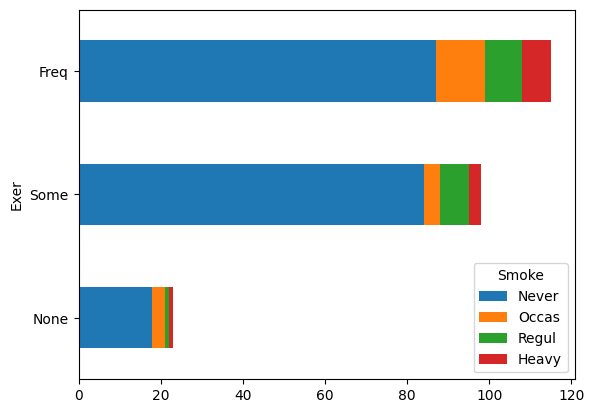

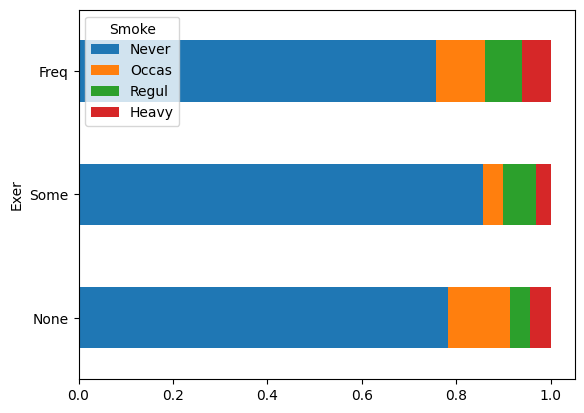

In [95]:
#sns.catplot(data=df, x='Smoke', hue='Exer', kind='count')
# Contingency table without the margins
observed = pd.crosstab(df['Exer'], df['Smoke'])

# Horizontally oriented stacked bar chart
observed.plot(kind='barh', stacked=True)

# Contingency table without the margins
observed_p = pd.crosstab(df['Exer'], df['Smoke'], normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True)

* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [96]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df['Exer'], df['Smoke'])
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = .05 

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Critical value     : 12.5916
Chi-squared       : 5.4885
Degrees of freedom: 6
P-value           : 0.4828


In [98]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df['W.Hnd'], df['Fold'])
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = .05 

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Critical value     : 5.9915
Chi-squared       : 1.5814
Degrees of freedom: 2
P-value           : 0.4535


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [99]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df['Sex'], df['Smoke'])
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = .05 

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)


Critical value     : 7.8147
Chi-squared       : 3.5536
Degrees of freedom: 3
P-value           : 0.3139


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [100]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(df['Sex'], df['W.Hnd'])
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = .05 

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Critical value     : 3.8415
Chi-squared       : 0.2356
Degrees of freedom: 1
P-value           : 0.6274
